In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


To make sure the dataset is okay

## Initial Data Inspection

In [3]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
963,female,group C,some high school,free/reduced,completed,65,76,75
474,female,group B,associate's degree,standard,completed,90,90,91
31,female,group B,some college,standard,none,63,65,61
354,female,group C,some college,standard,none,59,71,70
18,male,group C,master's degree,free/reduced,completed,46,42,46


checking data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


So we have 3 Numerical features and 5 Categorical features

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


checking the duplicating values

In [6]:
df.duplicated().sum()

np.int64(0)

checking unique values

In [7]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


checking missing values

In [14]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
Total Score,0
Average Score,0


checking all unique values of categorical features as a list

In [8]:
print("Gender--> ", df['gender'].unique())

Gender-->  ['female' 'male']


In [9]:
print("Race/ethinicity--> ", df['race/ethnicity'].unique())

Race/ethinicity-->  ['group B' 'group C' 'group A' 'group D' 'group E']


In [10]:
print("Parental level of education--> ", df['parental level of education'].unique())

Parental level of education-->  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [11]:
print("Lunch--> ", df['lunch'].unique())

Lunch-->  ['standard' 'free/reduced']


In [12]:
print("Test preparation course--> ", df['test preparation course'].unique())

Test preparation course-->  ['none' 'completed']


Now we need to think about Numerical features, we can calculate total score and average score of every student

In [54]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average Score'] = df['Total Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Everything is okay; now can do our initial EDA analysis

# EDA

In [16]:
df['gender'].value_counts()


,count
gender,
female,518
male,482


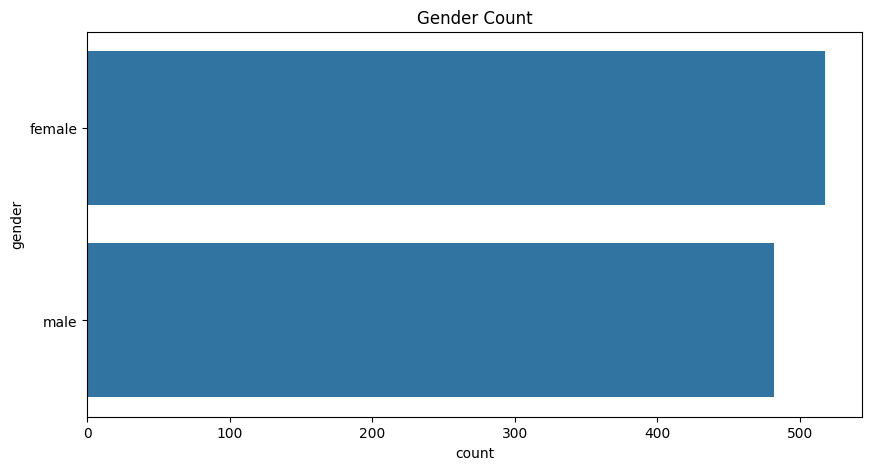

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(y='gender', data=df)
plt.title('Gender Count')
plt.show()

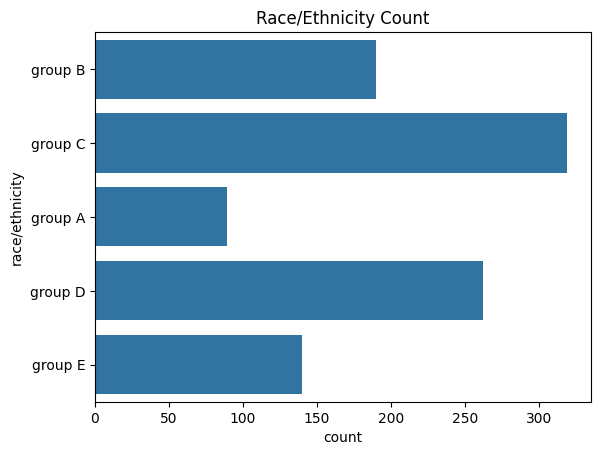

In [63]:
sns.countplot(y='race/ethnicity', data=df)
plt.title('Race/Ethnicity Count')
plt.show()

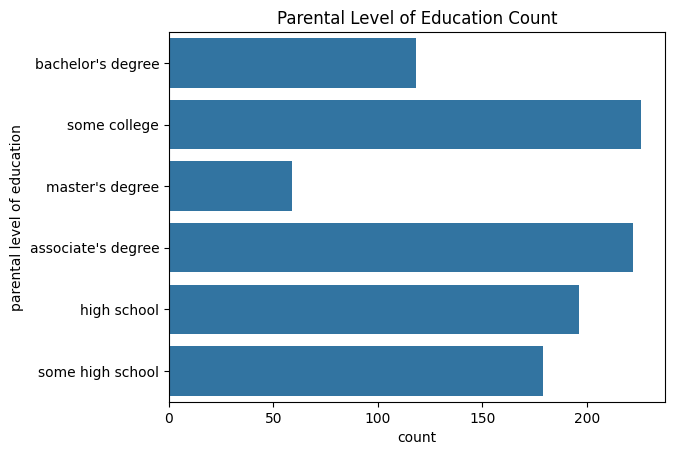

In [64]:
sns.countplot(y='parental level of education', data=df)
plt.title('Parental Level of Education Count')
plt.show()

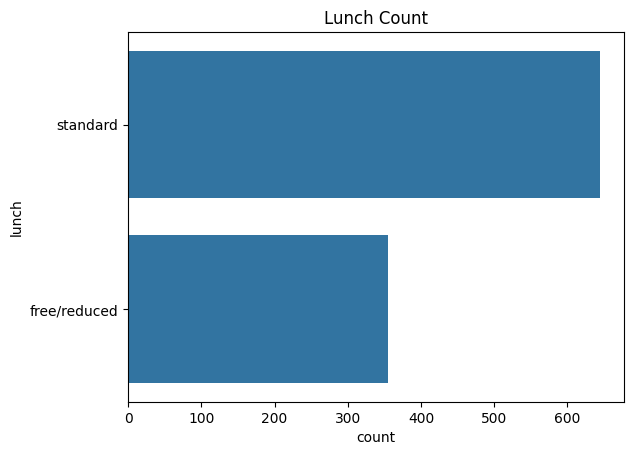

In [65]:
sns.countplot(y='lunch', data=df)
plt.title('Lunch Count')
plt.show()

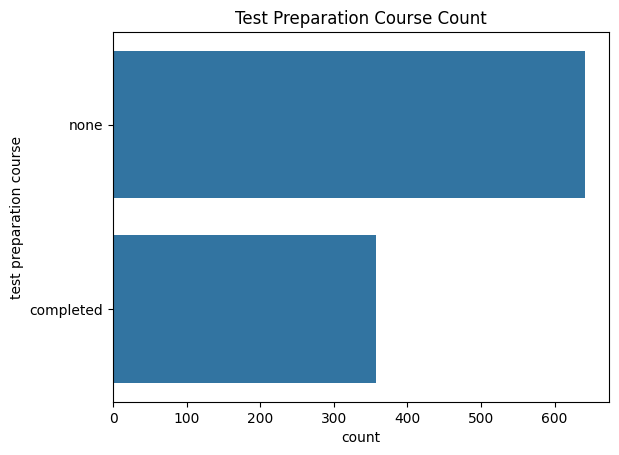

In [66]:
sns.countplot(y='test preparation course', data=df)
plt.title('Test Preparation Course Count')
plt.show()

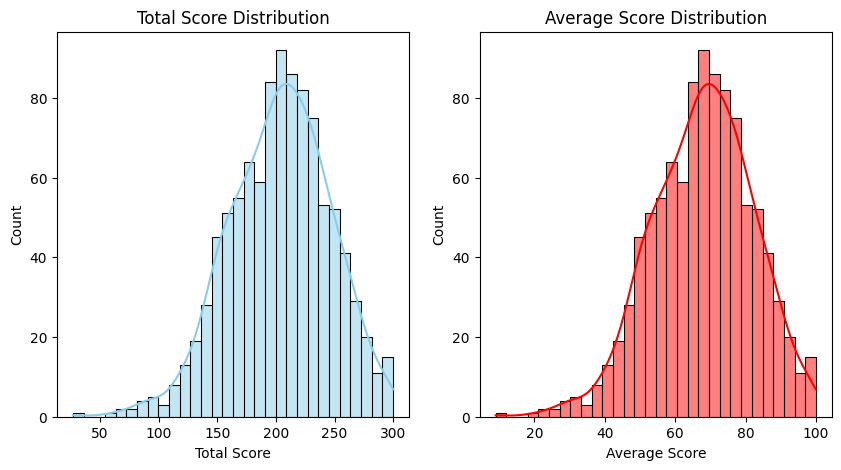

In [60]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Total Score',kde=True, bins=30, color='skyblue')
plt.title('Total Score Distribution')
plt.subplot(1,2,2)
sns.histplot(data=df, x='Average Score',kde=True, bins=30, color='red')
plt.title('Average Score Distribution')
plt.show()

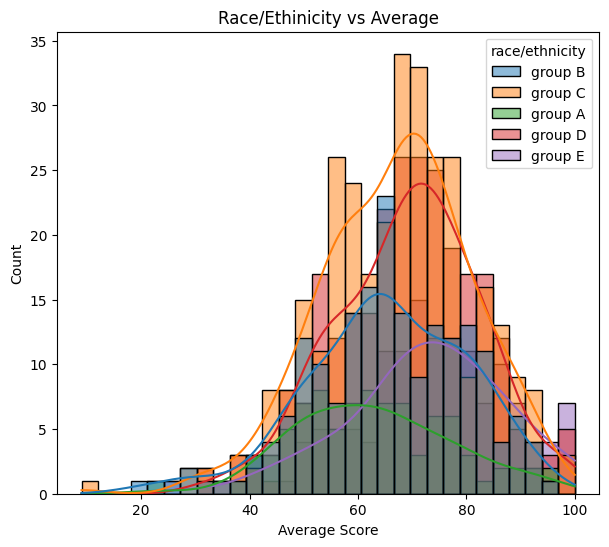

In [68]:
plt.figure(figsize=(7, 6))
plt.title("Race/Ethinicity vs Average")
sns.histplot(data=df, x='Average Score', hue='race/ethnicity', kde=True, bins=30)
plt.show()

checking correlation

In [34]:
# one-hot encoding --> gender is object here
new = pd.get_dummies(new, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
# Calculating correlation
correlation = new.corr()['Total Score']
print(correlation)


math score                                        0.918746
reading score                                     0.970331
writing score                                     0.965667
Total Score                                       1.000000
Average Score                                     1.000000
gender_female                                     0.130861
gender_male                                      -0.130861
race/ethnicity_group A                           -0.104803
race/ethnicity_group B                           -0.078247
race/ethnicity_group C                           -0.030691
race/ethnicity_group D                            0.058902
race/ethnicity_group E                            0.141050
parental level of education_associate's degree    0.067414
parental level of education_bachelor's degree     0.106599
parental level of education_high school          -0.161936
parental level of education_master's degree       0.102411
parental level of education_some college          0.0267

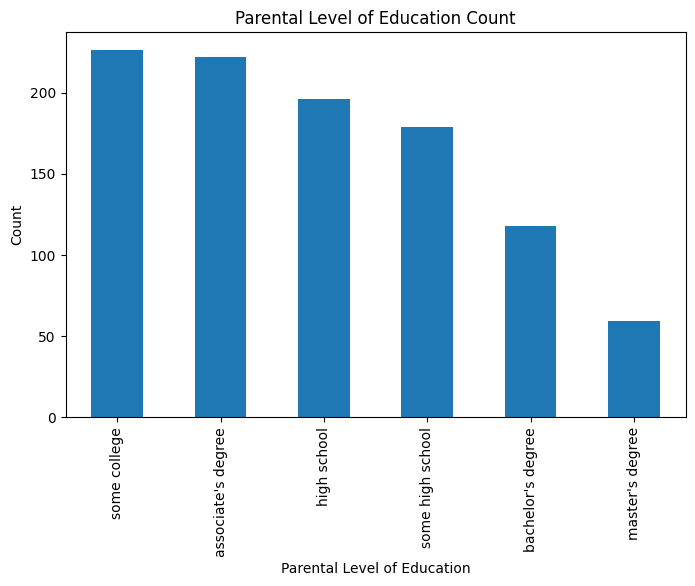

In [35]:
plt.figure(figsize=(8,5))
df['parental level of education'].value_counts().plot(kind='bar')
plt.title('Parental Level of Education Count')
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')
plt.show()

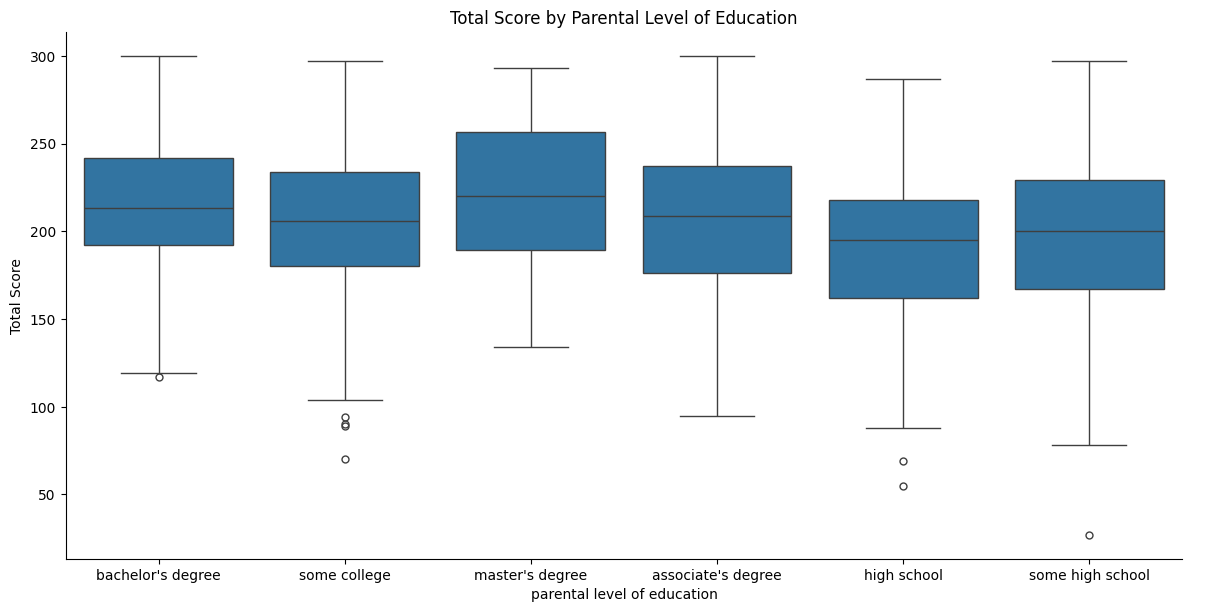

In [51]:
sns.catplot(x='parental level of education', y='Total Score', data=df, kind='box', height = 6, aspect = 2)
plt.title('Total Score by Parental Level of Education')
plt.show()

Need to work with test prep

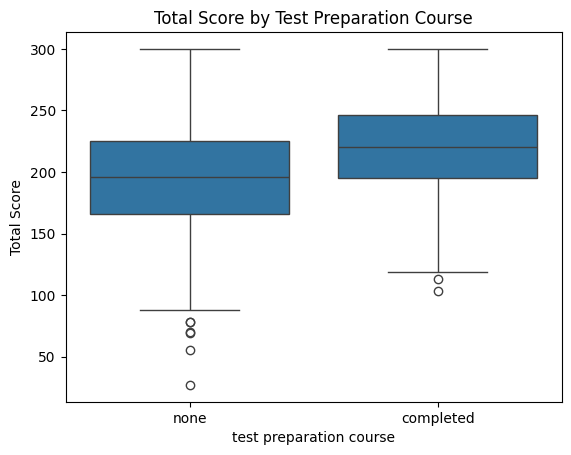

In [55]:
sns.boxplot(x='test preparation course', y='Total Score', data = df)
plt.title('Total Score by Test Preparation Course')
plt.show()